<a href="https://colab.research.google.com/github/aftabn81/TicketCopilot24/blob/main/TicketCopilotv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Getting Dependencies

In [ ]:
!pip install --upgrade --quiet  langchain-googledrive PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.0/273.0 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install openai langchain langchain_community langchain_openai faiss-cpu==1.7.4 langchainhub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install -qU pymupdf pypdf tiktoken langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 47.3 MB/s eta 0:00:00


In [ ]:
#import Libraries

import openai
import langchain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain_community.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain
from PyPDF2 import PdfReader
# Importing the json module
import json
#import pandas to read dataframe
import pandas as pd
#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import getpass

In [ ]:
openaikey = getpass.getpass("OpenAI API Key:")

OpenAI API Key:··········


In [ ]:
!git clone https://github.com/aftabn81/TicketCopilot.git

Cloning into 'TicketCopilot'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 190.24 KiB | 1.42 MiB/s, done.


In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(
    'TicketCopilot/Ticket_Master_Training_v2.pdf'
)

documents = loader.load()

In [ ]:
documents

[Document(page_content='1 | P a g e  \nAUTOMATED IT SUPPORT TICKET HANDLING WITH AI: A GUIDE \nIntroduction to TechAssist Solutions \nWelcome to TechAssist Solutions, a pioneer in leveraging cutting-edge artificial intelligence to \nrevolutionize IT support services. Our company prides itself on deploying advanced language processing \nmodels to streamline ticket resolution processes, enhance efficiency, and elevate customer satisfaction. \nAt the heart of our service portfolio is our AI-driven support system, designed to interpret, classify, and \nrespond to IT support tickets with unmatched precision and speed. \nThe Task: Optimizing IT Support with AI \nTechAssist Solutions embarks on a mission to automate the handling of IT support tickets, transforming \na traditionally human-centric operation into a seamless AI-powered workflow. Our goal is simple yet \nambitious: to reduce response times, eliminate bottlenecks, and provide consistently high-quality \nsupport to our diverse clien

In [18]:
documents[0].metadata

{'source': 'TicketCopilot/Ticket_Master_Training_v2.pdf',
 'file_path': 'TicketCopilot/Ticket_Master_Training_v2.pdf',
 'page': 0,
 'total_pages': 9,
 'format': 'PDF 1.7',
 'title': '',
 'author': 'Aftab, Noor',
 'subject': '',
 'keywords': '',
 'creator': 'Microsoft® Word LTSC',
 'producer': 'Microsoft® Word LTSC',
 'creationDate': "D:20240325191408-07'00'",
 'modDate': "D:20240325191408-07'00'",
 'trapped': ''}

In [ ]:
len(documents)

9

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 700,
    chunk_overlap = 50
)

documents = text_splitter.split_documents(documents)

In [ ]:
len(documents)

35

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small", api_key = openaikey
)

In [19]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(documents, embeddings)

In [20]:
retriever = vector_store.as_retriever()

In [21]:
retrieved_documents = retriever.invoke("What is the company name?")

In [22]:
for doc in retrieved_documents:
  print(doc)

page_content="technologically advanced. Through this process, our customer service engineer ensures that every ticket \nis an opportunity to showcase our expertise and dedication to our customers. \n \n3. Tags and Metadata Generation  \nIn the domain of IT support, the generation of tags and metadata is not merely about organization — it's \nabout creating a language through which a complex system can communicate clearly and categorize \nefficiently. TechAssist Solutions employs its LLM to perform this task with precision, dissecting the \nlanguage of support tickets to identify critical elements that will serve as tags." metadata={'source': 'TicketCopilot/Ticket_Master_Training_v2.pdf', 'file_path': 'TicketCopilot/Ticket_Master_Training_v2.pdf', 'page': 4, 'total_pages': 9, 'format': 'PDF 1.7', 'title': '', 'author': 'Aftab, Noor', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word LTSC', 'producer': 'Microsoft® Word LTSC', 'creationDate': "D:20240325191408-07'00'", 'modDate':

In [23]:
from langchain.prompts import ChatPromptTemplate

template2 = """You are an IT support engineer. You will analyze support tickets and provide responses based on context.
If you do not know an answer, respond with 'We will escalate your ticket to our support agents'.

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template2)


In [24]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

base_qa_llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0, api_key=openaikey)

###QA Chain

retrieval_augmented_qa_chain_basic = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | base_qa_llm, "context": itemgetter("context")}
)



In [25]:
question = "What are the different levels of priortity for tickets?"

result = retrieval_augmented_qa_chain_basic.invoke({"question" : question})

print(result["response"].content)

The different levels of priority for tickets are as follows:
1. Immediate Priority Response (Priority 5)
2. Expedited (Within 1 Business Day) - Priority 4
3. High (Within 3 Business Days) - Priority 3
4. Moderate (Within a Week) - Priority 2
5. Low (Flexible) - Priority 1

If you need further assistance, feel free to ask.


In [26]:
question = '''Wi-Fi is inconsistent despite proximity to the router. This is affecting my work. Help needed. What will be the classification of this ticket.
Just return classification and nothing else.'''
result = retrieval_augmented_qa_chain_basic.invoke({"question" : question})

print(result["response"].content)

Hardware Issues


In [27]:
question = "Wi-Fi is inconsistent despite proximity to the router. This is affecting my work. What will the priority of this ticket?"
result = retrieval_augmented_qa_chain_basic.invoke({"question" : question})

print(result["response"].content)

Based on the context provided, the issue of inconsistent Wi-Fi affecting work would likely fall under a Priority 5 (Urgent) ticket. This is because it impacts productivity and could have significant consequences for business continuity. It is a high-impact problem that affects the user's ability to work effectively.


In [28]:
question = '''I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device.
Can you please prioritize the data recovery process and guide me. Provide classification of the ticke'''
result = retrieval_augmented_qa_chain_basic.invoke({"question" : question})

print(result["response"].content)

Based on the context provided, your issue falls under the category of Data Recovery. Since you have experienced accidental deletion leading to substantial data loss, it is crucial to prioritize the data recovery process.

Given the severity of the situation, we will escalate your ticket to our support agents who specialize in data recovery. They will guide you through the necessary steps to recover your lost work documents and ensure that further actions on your device do not worsen the situation.

Thank you for reaching out, and rest assured that our team will assist you promptly.


##Batch Processing Support Ticket

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
data = pd.read_csv('/content/drive/MyDrive/TicketTest/Support_ticket_text_data.csv')

In [31]:
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,"My external hard drive isn't being recognized,..."
3,ST2023-009,"My smartphone battery is draining rapidly, eve..."
4,ST2023-010,I'm locked out of my online banking account an...


###Data pre-processing check

In [32]:
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

In [33]:
data1 = data.copy()

In [47]:
# Define the function to generate AI responses
def generate_category(ticket_text):
    instruction = f'''You are analyzing a support ticket: {ticket_text}. Analyze the ticket and assign only one category from: Hardware Issue, Software Issues, Network Issue,
    Data Protection Issue, Other. Use the category that best matches the issue in {ticket_text}. Just return the category and nothing else.'''

    result = retrieval_augmented_qa_chain_basic.invoke({"question": instruction})
    return result['response'].content if 'response' in result and result['response'] else "No response generated"

# Apply the function to each support ticket text and store the responses in a new column
data1['Category'] = data1['support_ticket_text'].apply(lambda x: generate_category(x))


In [48]:
data1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Network Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue
2,ST2023-008,"My external hard drive isn't being recognized,...",Data Recovery Issue
3,ST2023-009,"My smartphone battery is draining rapidly, eve...",Category: Hardware Issue
4,ST2023-010,I'm locked out of my online banking account an...,Data Protection Issue


In [49]:
# Define the function to generate AI responses
def generate_priority(ticket_text):
    instruction = f'''You are analyzing a support ticket: {ticket_text}. Based on the content of the ticket, generate a priority based on content as:
        - Priority 1 (Low): The issue is more of an inconvenience than a blockage, with no immediate time constraint or significant impact on operations.
        - Priority 2 (Moderate): The user's workflow is impeded but not completely stopped, or it affects a non-essential aspect of their work.
        - Priority 3 (High): Core job functions are disrupted, impacting the user's productivity directly, with no immediate workaround available.
        - Priority 4 (Critical): The issue is preventing a team from functioning efficiently, perhaps stopping a collaborative task, with wider implications if left unresolved.
        - Priority 5 (Urgent): A high-impact problem that affects multiple users or entire systems, with potential significant consequences for business continuity and requiring immediate attention.

        Use priority that best matches the issue in {ticket_text}. Just return the priority and nothing else.'''

    result = retrieval_augmented_qa_chain_basic.invoke({"question": instruction})
    return result['response'].content if 'response' in result and result['response'] else "No response generated"

# Apply the function to each support ticket text and store the responses in a new column
data1['Priority'] = data1['support_ticket_text'].apply(lambda x: generate_priority(x))

In [50]:
data1.head()

,support_tick_id,support_ticket_text,Category,Priority
0,ST2023-006,My internet connection has significantly slowe...,Network Issue,Priority 3 (High)
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,Priority 3 (High)
2,ST2023-008,"My external hard drive isn't being recognized,...",Data Recovery Issue,Priority 3 (High)
3,ST2023-009,"My smartphone battery is draining rapidly, eve...",Category: Hardware Issue,Priority 2 (Moderate)
4,ST2023-010,I'm locked out of my online banking account an...,Data Protection Issue,Priority 5 (Urgent)


In [51]:
# Define the function to generate ETA
def generate_eta(ticket_text):
    instruction = f'''You are analyzing a support ticket: {ticket_text}. Analyze the ticket and assign an ETA based on context. Use the ETA that best matches the issue in {ticket_text}.
    Just return the ETA and no other text.'''

    result = retrieval_augmented_qa_chain_basic.invoke({"question": instruction})
    return result['response'].content if 'response' in result and result['response'] else "No response generated"

# Apply the function to each support ticket text and store the responses in a new column
data1['ETA'] = data1['support_ticket_text'].apply(lambda x: generate_eta(x))

In [52]:
data1.head()

,support_tick_id,support_ticket_text,Category,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Network Issue,Priority 3 (High),Within a Week
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,Priority 3 (High),Immediate (Within Hours)
2,ST2023-008,"My external hard drive isn't being recognized,...",Data Recovery Issue,Priority 3 (High),Immediate (Within Hours)
3,ST2023-009,"My smartphone battery is draining rapidly, eve...",Category: Hardware Issue,Priority 2 (Moderate),Immediate (Within Hours)
4,ST2023-010,I'm locked out of my online banking account an...,Data Protection Issue,Priority 5 (Urgent),Immediate (Within Hours)


In [53]:
# Define the function to generate draft responses
def generate_draft_response(ticket_text):
    instruction = f'''You are analyzing a support ticket: {ticket_text}. Generate a draft response based on the ticket content. Start with Dear Customer'''

    result = retrieval_augmented_qa_chain_basic.invoke({"question": instruction})
    return result['response'].content if 'response' in result and result['response'] else "No response generated"

# Apply the function to each support ticket text and store the responses in a new column
data1['Response'] = data1['support_ticket_text'].apply(lambda x: generate_draft_response(x))


In [ ]:
data1.head()

,support_tick_id,support_ticket_text,Category,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Network Issue,Priority 3 (High),Within a Week,"Dear Customer,\n\nThank you for reaching out a..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,Priority 3 (High),Immediate (Within Hours),"Dear Customer,\n\nWe understand the urgency of..."
2,ST2023-008,"My external hard drive isn't being recognized,...",Data Recovery Issue,Priority 3 (High),Immediate (Within Hours),"Dear Customer,\n\nWe understand the importance..."
3,ST2023-009,"My smartphone battery is draining rapidly, eve...",Hardware Issue,Priority 2 (Moderate),Moderate (Within a Week),"Dear Customer,\n\nThank you for reaching out a..."
4,ST2023-010,I'm locked out of my online banking account an...,Data Protection Issue,Priority 5 (Urgent),Immediate (Within Hours),"Dear Customer,\n\nWe recognize the critical na..."


##Ticket Analytics

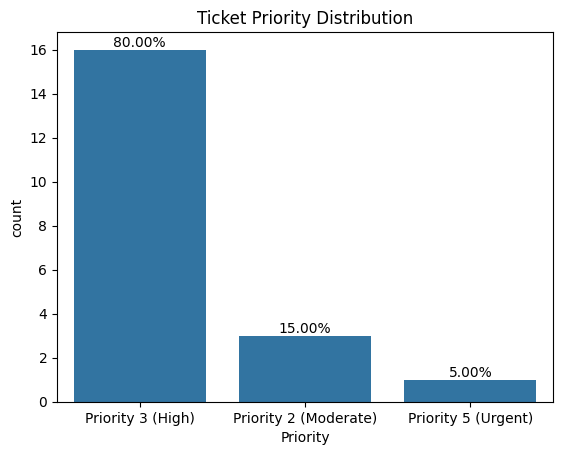

In [ ]:
# Calculate percentage for each category
total_count = len(data1['Priority'])
counts = data1['Priority'].value_counts()
percentages = counts / total_count * 100

# Create the countplot
ax = sns.countplot(data=data1, x='Priority')
ax.set_title('Ticket Priority Distribution')

# Add annotations with percentages
for i, p in enumerate(ax.patches):
    percentage = f'{percentages[i]:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

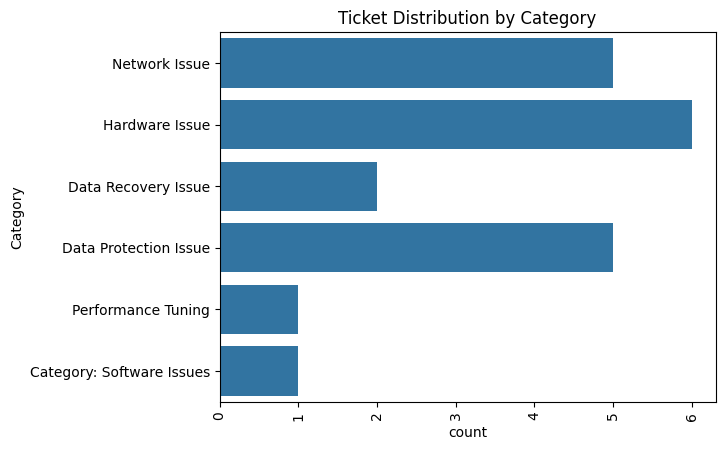

In [ ]:
# Create the countplot with y-axis as 'Category'
ax = sns.countplot(data=data1, y='Category')
ax.set_title('Ticket Distribution by Category')

# Rotate y-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()

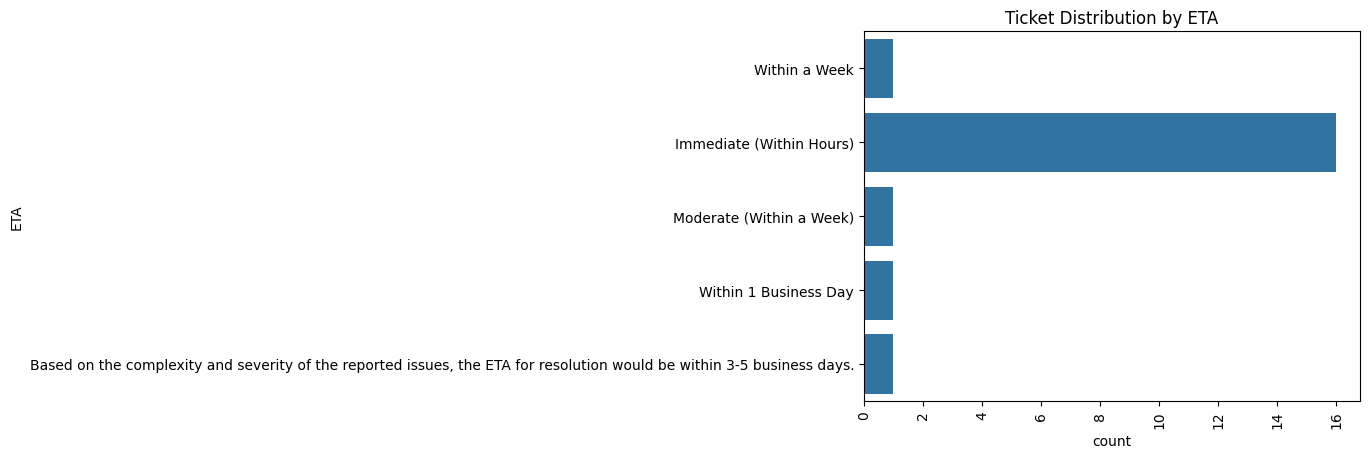

In [ ]:
total_count = len(data1['ETA'])
counts = data1['ETA'].value_counts()
percentages = counts / total_count * 100

# Create the countplot with y-axis as 'Category'
ax = sns.countplot(data=data1, y='ETA')
ax.set_title('Ticket Distribution by ETA')

# Rotate y-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()